In [1]:
import h5py, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
sys.path.append('/mnt/cbis/home/benedikt/.local/dragonfly/utils/py_src')

In [3]:
import writeemc
import detector
import reademc

In [4]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

In [5]:
emc_folder = path_to_recons + "template_0000/"
emc_output = emc_folder + "data/output_001.h5"
emc_photons = emc_folder + 'photons.txt'

In [6]:
with h5py.File(emc_output,'r') as f:
    #occupancies = f['occupancies'][:]
    likelihood = f['likelihood'][:]
    orientations = f['orientations'][:]
    volume = f['intens'][0]
    scale = f['scale'][:]
    prob = f['probabilities/prob'][:]
    numrot = f['probabilities/num_rot'][:]
    place = f['probabilities/place'][:]
    blacklist = (scale == 1)
    weights = f['inter_weight'][0]
    print(list(f))

['intens', 'inter_weight', 'likelihood', 'mutual_info', 'orientations', 'probabilities', 'scale']


In [7]:
print(volume.shape)

(105, 105, 105)


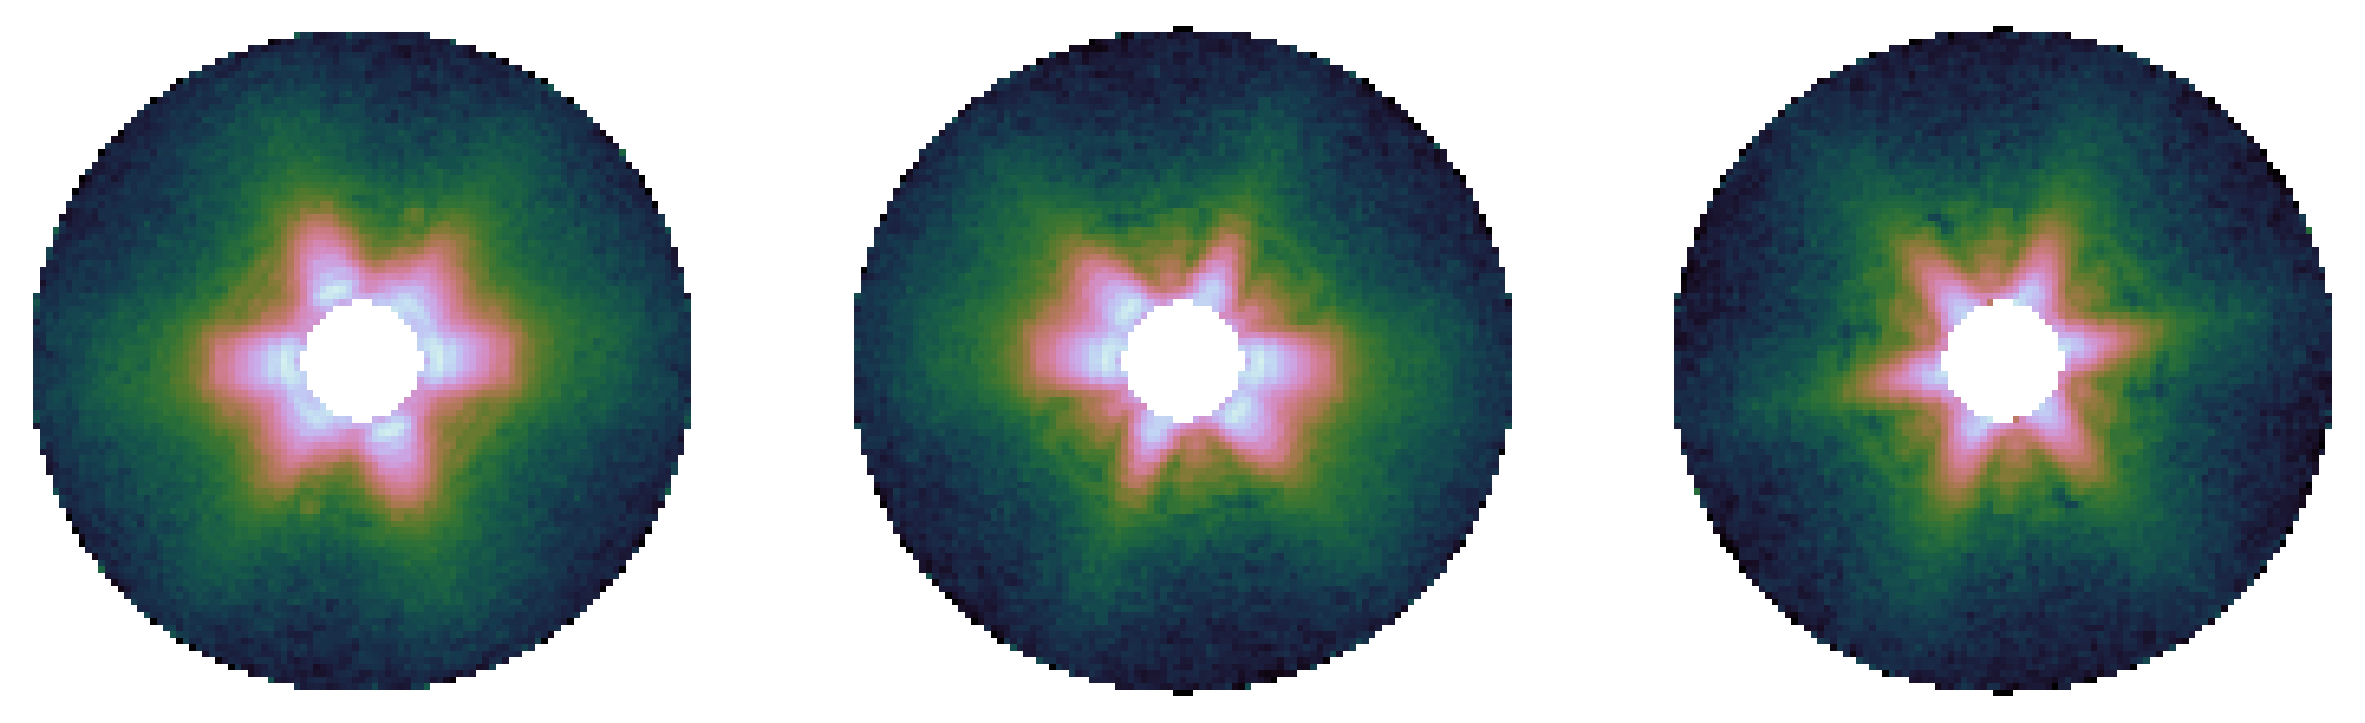

In [8]:
nx,ny,nz = volume.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
[ax.axis('off') for ax in axes]
axes[0].imshow(volume[nx//2],     norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[1].imshow(volume[:,ny//2],   norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[2].imshow(volume[:,:,nz//2], norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
plt.show()

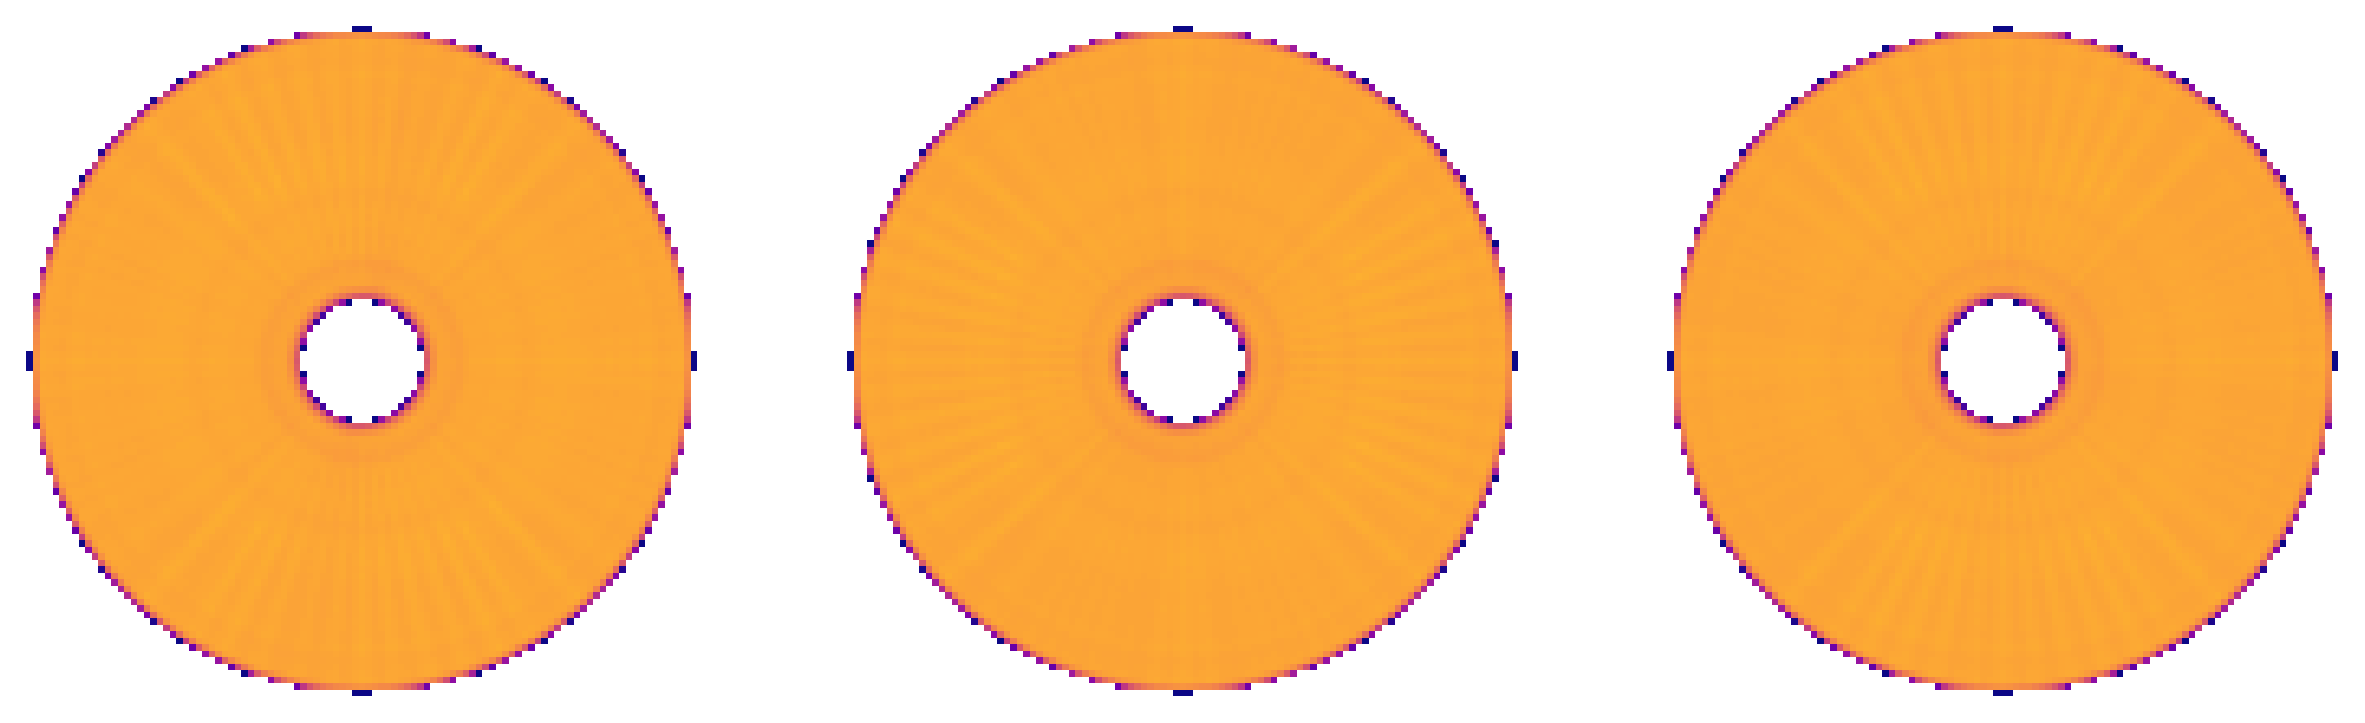

In [9]:
nx,ny,nz = weights.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
[ax.axis('off') for ax in axes]
axes[0].imshow(weights[nx//2],     norm=colors.LogNorm(vmin=0.1, vmax=1e4), cmap='plasma')
axes[1].imshow(weights[:,ny//2],   norm=colors.LogNorm(vmin=0.1, vmax=1e4), cmap='plasma')
axes[2].imshow(weights[:,:,nz//2], norm=colors.LogNorm(vmin=0.1, vmax=1e4), cmap='plasma')
plt.show()

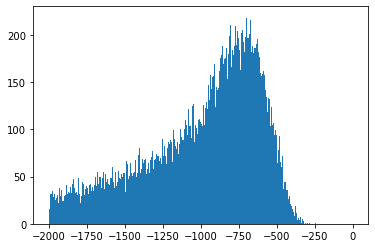

In [24]:
plt.hist(likelihood[~blacklist], bins=1000, range=(-2000,0))
plt.show()

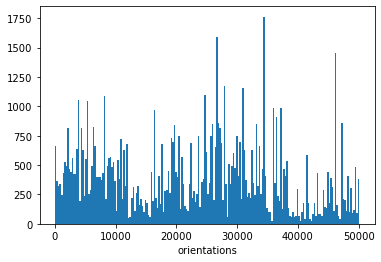

In [26]:
plt.figure()
plt.hist(orientations[~blacklist],  bins=200)
plt.xlabel('orientations')
plt.show()

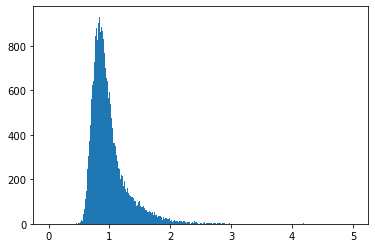

In [27]:
plt.hist(scale[~blacklist], range=(0,5), bins=1000)
plt.show()

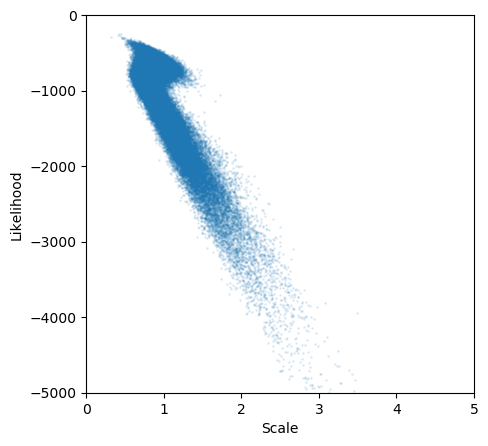

In [28]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(scale[~blacklist], likelihood[~blacklist], alpha=0.1, s=1)
plt.xlim(0,5)
plt.ylim(-5000,0)
plt.xlabel("Scale")
plt.ylabel("Likelihood")
plt.show()

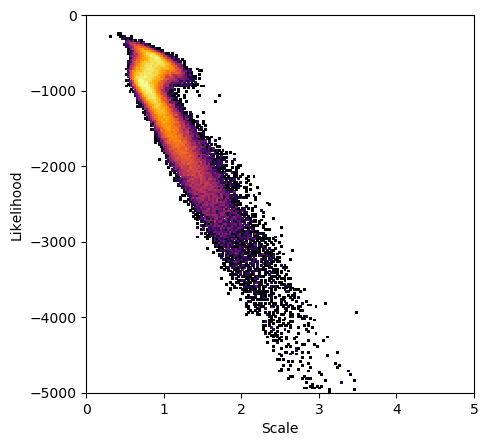

In [29]:
plt.figure(figsize=(5,5), dpi=100)
plt.hist2d(scale[~blacklist], likelihood[~blacklist], range=([0,5], [-5000,0]), bins=200, norm=colors.LogNorm(), cmap='inferno')
#plt.xlim(0,5)
#plt.ylim(-3000,0)
plt.xlabel("Scale")
plt.ylabel("Likelihood")
plt.show()

In [34]:
print(likelihood.sum()*1e-9)

-0.313298105789


In [22]:
likelihood[~blacklist]

(79469,)

251967